In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [3]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# !pip install imbalanced-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer, f1_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB 

### Область работы 2 (поиск  модели .... )

In [6]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [7]:
df = pd.read_csv(path_train)

## EDA

In [10]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.0,0.74,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
1,11.0,0.26,0.68,2.55,0.085,10.0,25.0,0.99700,3.18,0.61,11.8,5
2,7.3,0.38,0.21,2.00,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5


In [11]:
# fixed acidity — фиксированная кислотность
# volatile acidity — летучая кислотность
# citric acid — лимонная кислота
# residual sugar — остаточный сахар
# chlorides — хлориды
# free sulfur dioxide — свободный диоксид серы
# total sulfur dioxide — общий диоксид серы
# density — плотность
# pH — водородный показатель (pH)
# sulphates — сульфаты
# alcohol — содержание алкоголя
# quality — качество

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1294 non-null   float64
 1   volatile acidity      1294 non-null   float64
 2   citric acid           1295 non-null   float64
 3   residual sugar        1295 non-null   float64
 4   chlorides             1295 non-null   float64
 5   free sulfur dioxide   1295 non-null   float64
 6   total sulfur dioxide  1295 non-null   float64
 7   density               1295 non-null   float64
 8   pH                    1294 non-null   float64
 9   sulphates             1293 non-null   float64
 10  alcohol               1295 non-null   float64
 11  quality               1295 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 121.5 KB


**Замечаем отсутствующие значения**

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1294.000000,1294.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1294.000000,1293.000000,1295.000000,1295.000000
mean,8.438872,0.500920,0.298880,2.573398,0.085467,15.362934,44.651351,0.996576,3.303648,0.678415,10.676100,5.937452
std,1.818823,0.182181,0.200443,1.366700,0.045056,10.487662,35.420622,0.001968,0.157238,0.169927,1.174136,0.955717
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,7.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.200000,0.360000,0.120000,1.900000,0.068000,7.000000,20.000000,0.995315,3.200000,0.570000,9.600000,5.000000
50%,8.100000,0.480000,0.310000,2.200000,0.078000,13.000000,34.000000,0.996600,3.300000,0.640000,10.500000,6.000000
75%,9.400000,0.620000,0.455000,2.600000,0.090000,21.000000,57.000000,0.997765,3.390000,0.760000,11.500000,7.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


In [15]:
df.isna().sum()

fixed acidity           1
volatile acidity        1
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [16]:
df[df.isnull().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
637,6.4,0.530,0.09,3.9,0.123,14.0,31.0,0.99680,3.50,NaN,11.0,4
698,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
720,NaN,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,NaN,0.66,10.2,5
1146,7.2,NaN,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6


**Пока что пренебрежем четырьмя строками, тем более они представляют класс 0, а не 1**

In [18]:
df = df.dropna()

In [19]:
df.duplicated().sum()

276

**Избавляемся от дубликатов**

In [21]:
df = df.drop_duplicates()

In [22]:
df['quality'].value_counts()

quality
5    432
6    399
7    125
4     39
8     13
3      7
Name: count, dtype: int64

In [23]:
# X = df.drop(['quality'], axis=1)
# y = np.where(df['quality'] >= 7, 1, 0)
df['qual'] = np.where(df['quality'] >= 7, 1, 0)

In [24]:
df = df.drop('quality', axis=1)

In [25]:
df.rename(columns={'qual': 'quality'}, inplace=True)

**Имеем большой дисбаланс классов /
А также вопрос, 8 это максимальная оценка вина, или 10 все же? Вина с оценкой 9 или 10 впринципе нет в train**

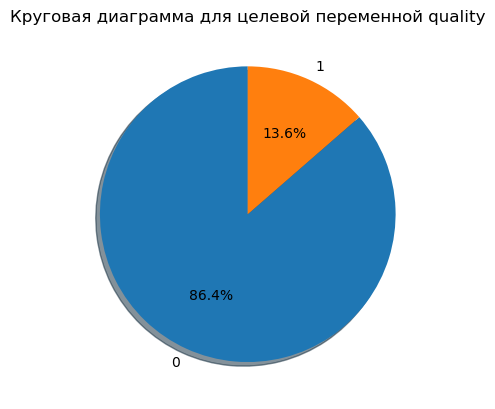

In [27]:
plt.pie(x=df['quality'].value_counts().values,
        labels=df['quality'].value_counts().index,
        startangle=90,
        autopct='%1.1f%%',
        shadow=True
       )
plt.title(f'Круговая диаграмма для целевой переменной quality')
plt.show()

**Проверим мультиколлинеарность**

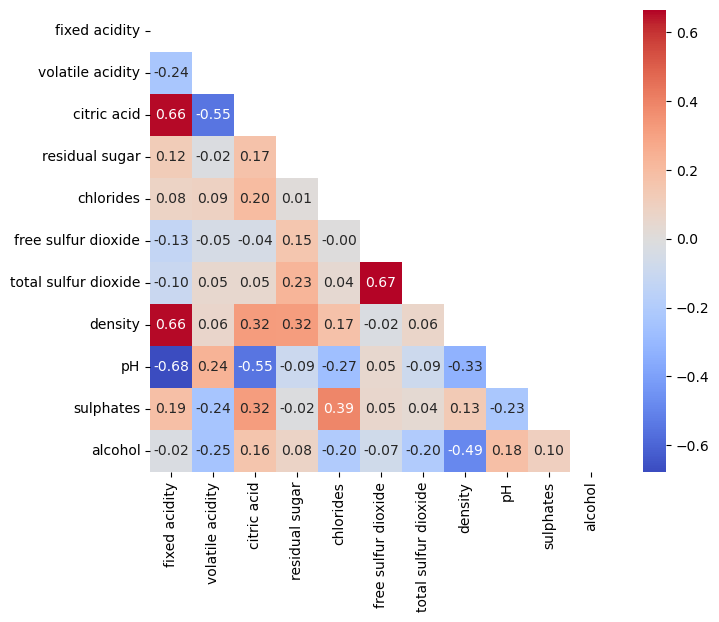

In [29]:
corr_matrix = df.drop('quality', axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.show()

**Замечена существенная корреляция между:** \
citric acid and fixed acidity \
density and fixed acidity \
pH and fixed acidity \
free sulfur dioxide and total sulfir dioxide

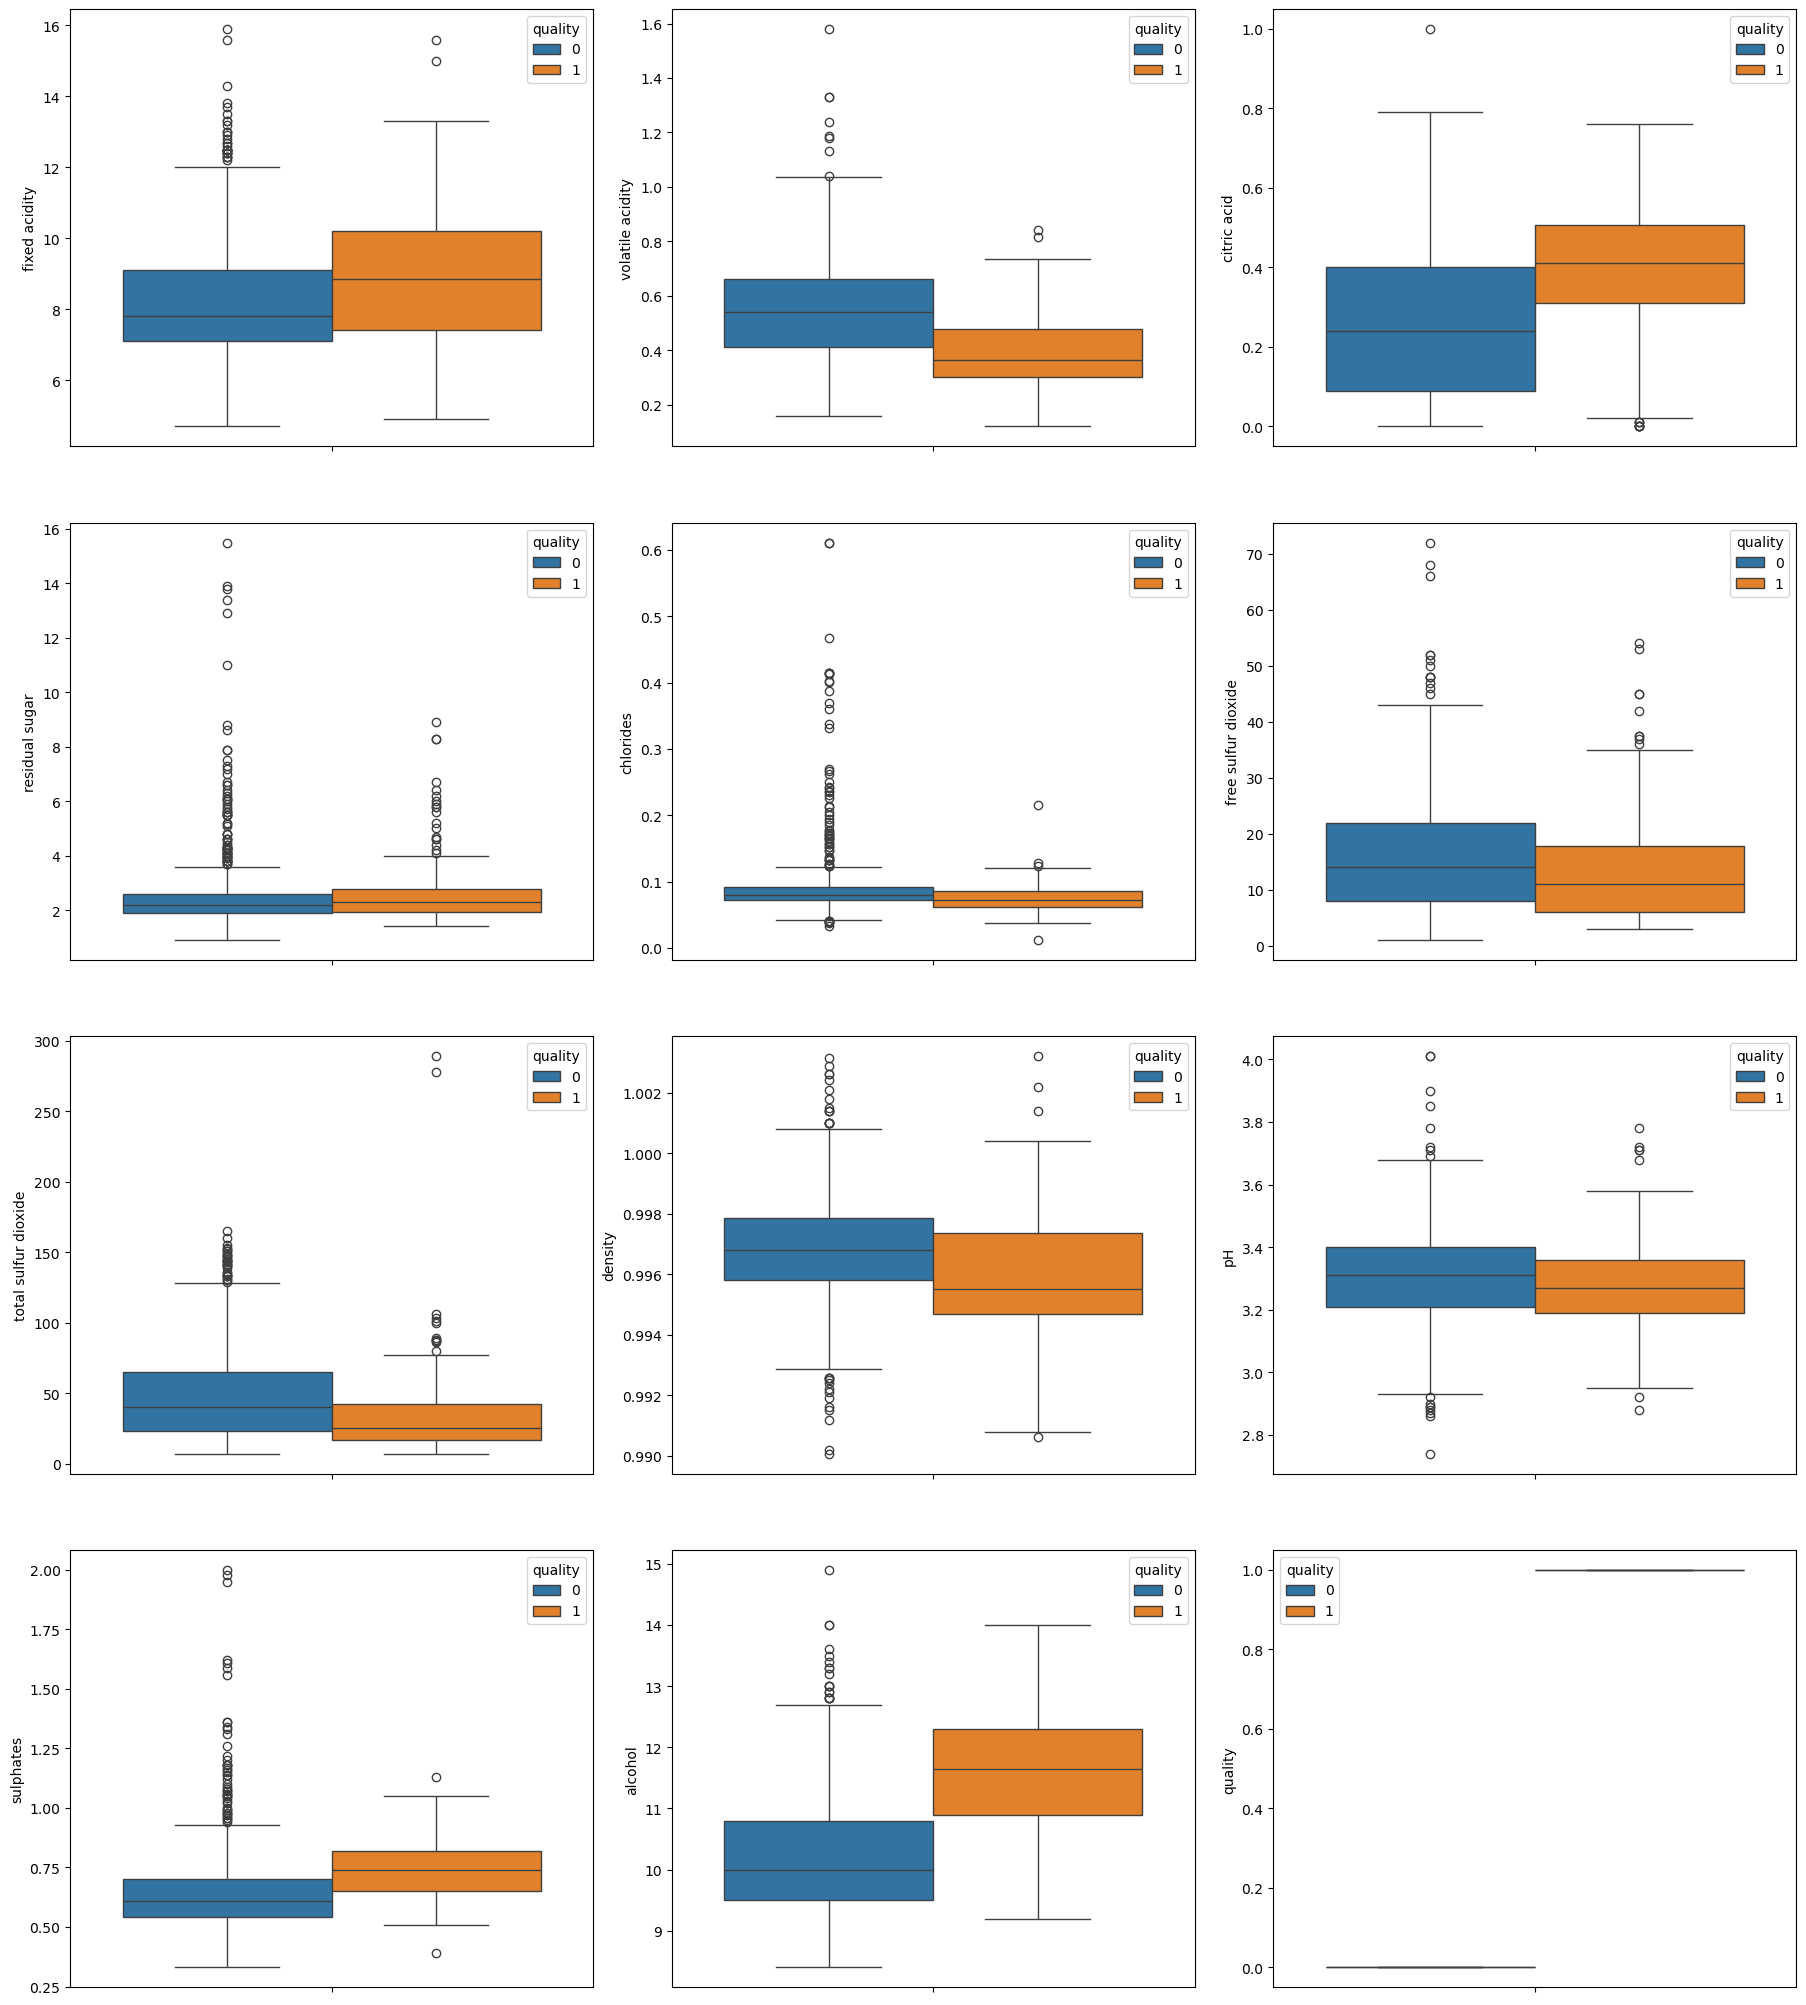

In [31]:
plot_cols = df.columns # выкидываем целевую переменную, она не нужна для боксплота
n_cols = 3  
n_rows = (len(plot_cols) + n_cols - 1) // n_cols  # расчет кол-ва строк
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(18, n_rows * 5))

ax = ax.flatten() # превращает двумерный массив осей (ax), созданный под n_cols и n_rows, в одномерный массив, 
# чтобы к ним было проще обращаться по индексу.

for index, col in enumerate(plot_cols):
    sns.boxplot(y=col, data=df, ax=ax[index], hue='quality')

for empty_ax in ax[len(plot_cols):]:
    empty_ax.set_visible(False)

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [32]:
X = df.drop('quality', axis=1)
y = df['quality']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                     test_size=0.25, stratify=y)

## K-ближайших соседей

In [35]:
knn = KNeighborsClassifier(n_neighbors=3) 

# Обучаем модель
knn.fit(X_train, y_train)

# Делаем предсказание на тестовых данных
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       219
           1       0.32      0.23      0.27        35

    accuracy                           0.83       254
   macro avg       0.60      0.58      0.58       254
weighted avg       0.80      0.83      0.81       254



**вместо Kfold используется StratifiedKFold чтобы учесть дисбаланс классов в фолдах**

In [37]:
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
score = make_scorer(precision_score, pos_label=1)

pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

# параметры
n_neighbors=[30]
p=[3, 4, 5, 6]
weights=['uniform','distance'] #штрафы на дистанции


param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler()],
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True, n_jobs=-1, scoring=score)
grid.fit(X_train,y_train)

print("Средняя правильность для наилучшей модели кроссвалидации на \
                валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_) # вывод лучших результатов
display(gridresults.sort_values(["rank_test_score"]).T)

Средняя правильность для наилучшей модели кроссвалидации на                 валидационных тестовых наборах: 0.791667

Правильность для наилучшей модели на тестовом наборе: 0.666667



,5,23,17,11,1,4,10,7,16,22,19,13,9,3,15,21,12,6,0,18,14,20,2,8
mean_fit_time,0.014683,0.008567,0.009966,0.00598,0.003991,0.003722,0.004485,0.004979,0.003987,0.003987,0.003738,0.003986,0.004485,0.002514,0.003737,0.006478,0.003737,0.004175,0.00827,0.007724,0.007226,0.005482,0.005359,0.006125
std_fit_time,0.012515,0.004481,0.006905,0.000705,0.002458,0.002396,0.000863,0.001129,0.0,0.000705,0.000826,0.000705,0.000498,0.004354,0.000432,0.005482,0.000432,0.00052,0.007346,0.006473,0.002479,0.000498,0.004719,0.00146
mean_score_time,0.042354,0.033135,0.033388,0.03551,0.052666,0.047583,0.046661,0.051161,0.040365,0.039867,0.053322,0.049335,0.037375,0.035166,0.037624,0.035631,0.042358,0.057706,0.048352,0.04485,0.050581,0.043604,0.054742,0.043604
std_score_time,0.006264,0.001261,0.001114,0.001065,0.00335,0.002349,0.007224,0.000869,0.001495,0.000704,0.008956,0.003191,0.004908,0.005025,0.00829,0.003021,0.002055,0.008824,0.006896,0.005769,0.008925,0.002852,0.005575,0.002577
param_classifier,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier()
param_classifier__n_neighbors,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
param_classifier__p,3,6,5,4,3,3,4,4,5,6,6,5,4,3,5,6,5,4,3,6,5,6,3,4
param_classifier__weights,distance,distance,distance,distance,uniform,distance,distance,uniform,distance,distance,uniform,uniform,distance,distance,distance,distance,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler()
params,"{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi..."


## Logistic Regression

In [39]:
clf = LogisticRegression(random_state=42, penalty=None, max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       219
           1       0.58      0.40      0.47        35

    accuracy                           0.88       254
   macro avg       0.75      0.68      0.70       254
weighted avg       0.86      0.88      0.87       254



In [40]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression())])

cv = StratifiedShuffleSplit(test_size = 0.4, train_size = 0.6, n_splits = 5
                            , random_state = 42)
score = make_scorer(precision_score, pos_label=1)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,'clf__penalty': ['l2', 'l1', None], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga']},
    {'preprocessing': scaling,'clf__penalty': ['l1'], 
         'clf__solver': ['liblinear']},
    {'preprocessing': scaling,'clf__penalty': [None], 
         'clf__solver': ['lbfgs','newton-cg']}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True, scoring=score)
grid.fit(X_train, y_train)

print("Средняя правильность для наилучшей модели кроссвалидации на \
                валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_) # вывод лучших результатов
display(gridresults.sort_values(["rank_test_score"]).T)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_clas

Средняя правильность для наилучшей модели кроссвалидации на                 валидационных тестовых наборах: 0.589538

Правильность для наилучшей модели на тестовом наборе: 0.480000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fi

,10,18,58,38,14,64,44,54,36,6,2,30,62,37,41,45,70,46,52,53,42,40,57,69,56,65,68,66,61,29,17,1,13,5,9,71,43,55,28,60,0,4,12,16,67,47,59,8,3,31,7,11,63,15,19,39,34,21,22,23,24,25,51,50,49,48,26,27,32,33,20,35
mean_fit_time,0.003874,0.008461,0.007915,0.009157,0.009009,0.005237,0.005227,0.008229,0.004675,0.004857,0.005086,0.003898,0.00387,0.00697,0.004276,0.003949,0.006147,0.005292,0.006608,0.006226,0.006693,0.00487,0.006895,0.003601,0.006789,0.003808,0.00565,0.00543,0.002567,0.002673,0.00604,0.004243,0.004481,0.003012,0.00281,0.00728,0.00683,0.006173,0.004688,0.003659,0.004099,0.00362,0.003445,0.003386,0.009539,0.009241,0.006466,0.002406,0.003234,0.002646,0.004077,0.002227,0.002459,0.003072,0.003286,0.005289,0.002666,0.001834,0.002647,0.001432,0.001415,0.001675,0.001604,0.002804,0.00201,0.001595,0.003022,0.001621,0.001615,0.00123,0.001232,0.001628
std_fit_time,0.000427,0.000732,0.00089,0.000637,0.00179,0.000758,0.000747,0.000747,0.000458,0.00079,0.000073,0.000412,0.000401,0.001171,0.000354,0.00083,0.000451,0.000452,0.000483,0.001172,0.000491,0.000707,0.000377,0.000492,0.000858,0.000744,0.000494,0.000514,0.000693,0.000475,0.000637,0.000704,0.00053,0.000007,0.000401,0.001455,0.000754,0.000044,0.000798,0.000482,0.000586,0.000507,0.000789,0.000526,0.001024,0.000994,0.000466,0.000494,0.000393,0.000529,0.000968,0.000428,0.000467,0.000135,0.000403,0.002084,0.000465,0.00042,0.000531,0.00046,0.000509,0.000522,0.00049,0.000405,0.000014,0.000488,0.000029,0.000497,0.000505,0.000414,0.000382,0.000495
mean_score_time,0.002202,0.001812,0.001818,0.001819,0.001811,0.002211,0.002448,0.001401,0.00165,0.001873,0.002047,0.001663,0.001605,0.001447,0.001865,0.002018,0.002204,0.001624,0.001825,0.002213,0.002641,0.002206,0.002002,0.001808,0.002015,0.002004,0.002208,0.001826,0.001595,0.001671,0.00168,0.002218,0.001805,0.002001,0.002007,0.002027,0.002205,0.001993,0.001199,0.002048,0.001832,0.002008,0.002053,0.001836,0.002239,0.002105,0.002034,0.002,0.00223,0.001643,0.002398,0.002047,0.001812,0.001726,0.002046,0.001831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.000394,0.000408,0.000393,0.000395,0.000408,0.000391,0.000451,0.000494,0.000465,0.000447,0.000036,0.000477,0.000497,0.000486,0.000388,0.000025,0.000402,0.000474,0.000417,0.000389,0.000448,0.000412,0.000017,0.000398,0.000065,0.000008,0.000406,0.000407,0.000488,0.000474,0.000462,0.00074,0.000705,0.000009,0.000019,0.000036,0.000759,0.0,0.000399,0.000034,0.000373,0.000023,0.000083,0.000422,0.000387,0.000207,0.000618,0.000007,0.000395,0.000484,0.00049,0.00009,0.000409,0.000455,0.00004,0.000375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_clf__penalty,l2,l2,None,l1,l2,None,None,None,l1,l2,l2,l1,l1,l1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,l1,l1,l2,l2,l2,l2,l2,None,None,None,l1,l1,l2,l2,l2,l2,None,None,None,l2,l2,l1,l2,l2,l1,l2,l2,l1,l1,l1,l1,l1,l1,l1,None,None,None,None,l1,l1,l1,l1,l1,l1
param_clf__solver,liblinear,saga,saga,saga,sag,lbfgs,lbfgs,sag,saga,lbfgs,newton-cg,liblinear,liblinear,saga,newton-cg,lbfgs,newton-cg,lbfgs,sag,sag,newton-cg,newton-cg,saga,newton-cg,saga,lbfgs,newton-cg,lbfgs,liblinear,liblinear,saga,newton-cg,sag,lbfgs,liblinear,newton-cg,newton-cg,sag,liblinear,liblinear,newton-cg,lbfgs,sag,saga,lbfgs,lbfgs,saga,liblinear,newton-cg,liblinear,lbfgs,liblinear,liblinear,sag,saga,saga,sag,newton-cg,newton-cg,newton-cg,lbfgs,lbfgs,liblinear,liblinear,liblinear,liblinear,lbfgs,lbfgs,sag,sag,newton-cg,sag
param_preprocessing,RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),MinMaxScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),RobustScaler(),StandardScaler(),StandardScaler(),StandardScaler(),

## Байесовский классификатор

In [138]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       165
           1       0.78      0.84      0.81       164

    accuracy                           0.81       329
   macro avg       0.81      0.81      0.81       329
weighted avg       0.81      0.81      0.81       329



In [43]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           GaussianNB())])

cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42)

score = make_scorer(precision_score, pos_label=1)

scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling, 
     'clf': [GaussianNB()]}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True, scoring=score)
grid.fit(X_train, y_train)

print("Средняя правильность для наилучшей модели кроссвалидации на \
                валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_) # вывод лучших результатов
display(gridresults.sort_values(["rank_test_score"]).T)

Средняя правильность для наилучшей модели кроссвалидации на                 валидационных тестовых наборах: 0.435517

Правильность для наилучшей модели на тестовом наборе: 0.400000



,0,1,2,3
mean_fit_time,0.002231,0.002016,0.003225,0.002018
std_fit_time,0.000432,0.000019,0.000413,0.00002
mean_score_time,0.002007,0.001421,0.001811,0.002016
std_score_time,0.000016,0.000503,0.000398,0.000018
param_clf,GaussianNB(),GaussianNB(),GaussianNB(),GaussianNB()
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf': GaussianNB(), 'preprocessing': MinMaxS...","{'clf': GaussianNB(), 'preprocessing': Standar...","{'clf': GaussianNB(), 'preprocessing': RobustS...","{'clf': GaussianNB(), 'preprocessing': Normali..."
split0_test_score,0.5,0.5,0.5,0.3
split1_test_score,0.418182,0.418182,0.418182,0.319149
split2_test_score,0.479167,0.479167,0.479167,0.428571


## Ключевая ошибка в Downsampling и Upsampling - расширение не только train но и test, поэтому следующие два блока никуда не годятся

## Downsampling

In [45]:

class_1 = df[df['quality'] == 1]
class_0 = df[df['quality'] == 0]

n_class_1 = len(class_1)
class_0_sampled = class_0.sample(n=n_class_1, random_state=42)

df_balanced = pd.concat([class_1, class_0_sampled])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [46]:
X = df_balanced.drop('quality', axis=1)
y = df_balanced['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                     test_size=0.25, stratify=y)

In [47]:
knn = KNeighborsClassifier(n_neighbors=3) 

# Обучаем модель
knn.fit(X_train, y_train)

# Делаем предсказание на тестовых данных
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76        35
           1       0.75      0.79      0.77        34

    accuracy                           0.77        69
   macro avg       0.77      0.77      0.77        69
weighted avg       0.77      0.77      0.77        69



In [48]:
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
score = make_scorer(precision_score, pos_label=1)

pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

# параметры
n_neighbors=[7, 8, 9]
p=[7, 8]
weights=['uniform','distance'] #штрафы на дистанции


param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler()],
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True, n_jobs=-1, scoring=score)
grid.fit(X_train,y_train)

print("Средняя правильность для наилучшей модели кроссвалидации на \
                валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_) # вывод лучших результатов
display(gridresults.sort_values(["rank_test_score"]).T)

Средняя правильность для наилучшей модели кроссвалидации на                 валидационных тестовых наборах: 0.849802

Правильность для наилучшей модели на тестовом наборе: 0.794118



,12,18,21,15,3,9,4,27,13,33,19,30,0,10,6,24,20,22,16,14,34,28,23,1,17,7,35,25,31,29,5,11,32,8,2,26
mean_fit_time,0.003788,0.002704,0.001963,0.003654,0.002339,0.00216,0.002033,0.006089,0.003322,0.002613,0.002492,0.005906,0.003552,0.004722,0.004116,0.003036,0.00416,0.003347,0.001993,0.004818,0.003154,0.001237,0.006674,0.0035,0.006029,0.001877,0.004381,0.004364,0.002386,0.006698,0.007826,0.00458,0.004556,0.004338,0.005002,0.007748
std_fit_time,0.003307,0.001385,0.002032,0.001486,0.001707,0.002185,0.002033,0.005006,0.00047,0.001235,0.001114,0.003852,0.000489,0.002747,0.005362,0.003401,0.001952,0.003369,0.00141,0.000685,0.002488,0.00175,0.003573,0.000488,0.002337,0.001917,0.000839,0.004267,0.001169,0.004736,0.002203,0.000586,0.00045,0.003408,0.000371,0.002986
mean_score_time,0.009769,0.013138,0.006153,0.004523,0.007978,0.014543,0.007262,0.007482,0.007641,0.00429,0.007863,0.007542,0.007143,0.004697,0.012628,0.003357,0.007373,0.004773,0.007074,0.006968,0.006979,0.006559,0.004186,0.007289,0.00972,0.007356,0.005481,0.005998,0.00583,0.003354,0.002479,0.004174,0.007641,0.015253,0.007474,0.005374
std_score_time,0.003367,0.009818,0.003478,0.001726,0.002857,0.014443,0.00444,0.005806,0.00047,0.001166,0.001068,0.001066,0.000371,0.001331,0.011044,0.004747,0.001734,0.003837,0.002643,0.001005,0.001789,0.003546,0.003588,0.001078,0.010482,0.003651,0.000635,0.00433,0.00464,0.004744,0.002501,0.002048,0.000742,0.010796,0.000498,0.004144
param_classifier,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier()
param_classifier__n_neighbors,8,8,8,8,7,7,7,9,8,9,8,9,7,7,7,9,8,8,8,8,9,9,8,7,8,7,9,9,9,9,7,7,9,7,7,9
param_classifier__p,7,8,8,7,7,8,7,7,7,8,8,8,7,8,8,7,8,8,7,7,8,7,8,7,7,8,8,7,8,7,7,8,8,8,7,7
param_classifier__weights,uniform,uniform,distance,distance,distance,distance,distance,distance,uniform,distance,uniform,uniform,uniform,distance,uniform,uniform,uniform,distance,distance,uniform,distance,distance,distance,uniform,distance,uniform,distance,uniform,uniform,distance,distance,distance,uniform,uniform,uniform,uniform
param_preprocessing,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),StandardScaler(),StandardScaler(),RobustScaler(),StandardScaler(),StandardScaler(),RobustScaler(),StandardScaler(),RobustScaler(),StandardScaler(),RobustScaler(),StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler()
params,"{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsCla

In [49]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           GaussianNB())])

cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42)

score = make_scorer(precision_score, pos_label=1)

scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling, 
     'clf': [GaussianNB()]}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True, scoring=score)
grid.fit(X_train, y_train)

print("Средняя правильность для наилучшей модели кроссвалидации на \
                валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_) # вывод лучших результатов
display(gridresults.sort_values(["rank_test_score"]).T)

Средняя правильность для наилучшей модели кроссвалидации на                 валидационных тестовых наборах: 0.795577

Правильность для наилучшей модели на тестовом наборе: 0.805556



,0,1,2,3
mean_fit_time,0.002233,0.001887,0.002649,0.001815
std_fit_time,0.0004,0.000399,0.000534,0.000358
mean_score_time,0.001827,0.001829,0.00145,0.001686
std_score_time,0.000372,0.000377,0.000522,0.000489
param_clf,GaussianNB(),GaussianNB(),GaussianNB(),GaussianNB()
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf': GaussianNB(), 'preprocessing': MinMaxS...","{'clf': GaussianNB(), 'preprocessing': Standar...","{'clf': GaussianNB(), 'preprocessing': RobustS...","{'clf': GaussianNB(), 'preprocessing': Normali..."
split0_test_score,0.814815,0.814815,0.814815,0.791667
split1_test_score,0.757576,0.757576,0.757576,0.741935
split2_test_score,0.78125,0.78125,0.78125,0.72


In [50]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression())])

cv = StratifiedShuffleSplit(test_size = 0.3, train_size = 0.7, n_splits = 8
                            , random_state = 42)

score = make_scorer(precision_score, pos_label=1)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid = [
    {'preprocessing': scaling,
     'clf__penalty': ['l2', 'l1'],
     'clf__solver': ['liblinear', 'saga'],
     'clf__max_iter': [1000],
     'clf__class_weight': ['balanced', None]
    }
]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True, scoring=score)
grid.fit(X_train, y_train)

print("Средняя правильность для наилучшей модели кроссвалидации на \
                валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_) # вывод лучших результатов
display(gridresults.sort_values(["rank_test_score"]).T)

Средняя правильность для наилучшей модели кроссвалидации на                 валидационных тестовых наборах: 0.815342

Правильность для наилучшей модели на тестовом наборе: 0.810811



,24,8,12,28,13,9,25,29,4,20,5,21,16,0,10,26,14,30,1,17,6,22,18,2,27,11,15,31,19,7,3,23
mean_fit_time,0.001808,0.002173,0.003162,0.002814,0.003891,0.002062,0.002155,0.003087,0.002985,0.00242,0.00332,0.003463,0.00188,0.002151,0.003075,0.002906,0.006394,0.005993,0.001903,0.001788,0.005628,0.005054,0.002946,0.003045,0.001903,0.002049,0.004233,0.004164,0.001914,0.002309,0.001908,0.002398
std_fit_time,0.000444,0.000342,0.00061,0.000406,0.001103,0.000041,0.00032,0.000526,0.000156,0.000487,0.000444,0.000491,0.000301,0.000338,0.00006,0.00035,0.000678,0.000723,0.000312,0.000434,0.00051,0.000344,0.000536,0.000035,0.000345,0.000043,0.001388,0.001757,0.000313,0.000471,0.000341,0.000497
mean_score_time,0.001802,0.001665,0.001639,0.002011,0.001643,0.001529,0.001533,0.001784,0.001044,0.00165,0.001678,0.001906,0.001789,0.001908,0.00152,0.001683,0.001383,0.001897,0.001767,0.001894,0.001418,0.00167,0.001507,0.001778,0.001788,0.001678,0.001789,0.001887,0.001773,0.001785,0.002032,0.001922
std_score_time,0.000469,0.000475,0.000498,0.000064,0.000454,0.000511,0.00049,0.000397,0.000048,0.000486,0.000455,0.000347,0.000411,0.000596,0.000524,0.000484,0.000475,0.000624,0.000421,0.00034,0.000479,0.000486,0.000487,0.000437,0.00043,0.000506,0.000434,0.000338,0.000422,0.000456,0.000036,0.000323
param_clf__class_weight,None,balanced,balanced,None,balanced,balanced,None,None,balanced,None,balanced,None,None,balanced,balanced,None,balanced,None,balanced,None,balanced,None,None,balanced,None,balanced,balanced,None,None,balanced,balanced,None
param_clf__max_iter,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
param_clf__penalty,l1,l1,l1,l1,l1,l1,l1,l1,l2,l2,l2,l2,l2,l2,l1,l1,l1,l1,l2,l2,l2,l2,l2,l2,l1,l1,l1,l1,l2,l2,l2,l2
param_clf__solver,liblinear,liblinear,saga,saga,saga,liblinear,liblinear,saga,saga,saga,saga,saga,liblinear,liblinear,liblinear,liblinear,saga,saga,liblinear,liblinear,saga,saga,liblinear,liblinear,liblinear,liblinear,saga,saga,liblinear,saga,liblinear,saga
param_preprocessing,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'cl

## Upsampling

In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Шаг 1: Разделяем признаки и целевую переменную
X = df.drop('quality', axis=1)  # Признаки
y = df['quality']  # Классы: 1 для 'quality >= 7', 0 для остальных

# Шаг 2: Разделяем на тренировочный и тестовый наборы (если необходимо)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Шаг 3: Применяем SMOTE для тренировочного набора
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Шаг 4: Создаем новый датафрейм с синтезированными строками
df_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)
df_resampled['quality'] = y_train_resampled

# Теперь df_resampled содержит синтезированные уникальные строки для класса 1


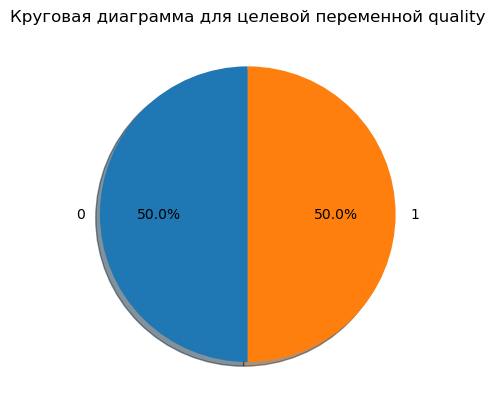

In [53]:
plt.pie(x=df_resampled['quality'].value_counts().values,
        labels=df_resampled['quality'].value_counts().index,
        startangle=90,
        autopct='%1.1f%%',
        shadow=True
       )
plt.title(f'Круговая диаграмма для целевой переменной quality')
plt.show()

In [54]:
X = df_resampled.drop('quality', axis=1)  # Признаки
y = df_resampled['quality']  # Классы: 1 для 'quality >= 7', 0 для остальных

# Шаг 2: Разделяем на тренировочный и тестовый наборы (если необходимо)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [55]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression())])

cv = StratifiedShuffleSplit(test_size = 0.3, train_size = 0.7, n_splits = 8
                            , random_state = 42)

score = make_scorer(precision_score, pos_label=1)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid = [
    {'preprocessing': scaling,
     'clf__penalty': ['l2', 'l1'],
     'clf__solver': ['liblinear', 'saga'],
     'clf__max_iter': [1000],
     'clf__class_weight': ['balanced', None]
    }
]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True, scoring=score)
grid.fit(X_train, y_train)

print("Средняя правильность для наилучшей модели кроссвалидации на \
                валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_) # вывод лучших результатов
display(gridresults.sort_values(["rank_test_score"]).T)

Средняя правильность для наилучшей модели кроссвалидации на                 валидационных тестовых наборах: 0.820005

Правильность для наилучшей модели на тестовом наборе: 0.818182



,24,8,12,28,30,14,29,13,10,26,25,9,6,22,5,1,17,21,2,18,4,20,16,0,15,31,11,27,19,3,7,23
mean_fit_time,0.007,0.007526,0.009891,0.007656,0.033629,0.032636,0.008893,0.009671,0.004705,0.004484,0.003405,0.00375,0.024351,0.023627,0.007873,0.003531,0.002816,0.007725,0.004042,0.003962,0.003878,0.003926,0.002689,0.003142,0.032281,0.03332,0.007178,0.007731,0.002434,0.002914,0.004188,0.003952
std_fit_time,0.001337,0.001027,0.002768,0.001958,0.013352,0.013005,0.003039,0.002893,0.000489,0.000483,0.000856,0.000388,0.007009,0.007229,0.001918,0.000493,0.000397,0.001509,0.00005,0.000369,0.000447,0.000574,0.000491,0.000375,0.000914,0.000937,0.000724,0.00043,0.0005,0.00035,0.000303,0.000558
mean_score_time,0.001783,0.001923,0.002757,0.001756,0.002028,0.001911,0.002051,0.001916,0.001915,0.00179,0.002045,0.001849,0.001658,0.001929,0.001906,0.002006,0.001926,0.001755,0.002017,0.001933,0.001819,0.001905,0.001796,0.002009,0.002288,0.002329,0.001903,0.001793,0.001921,0.002135,0.001903,0.001914
std_score_time,0.000431,0.000319,0.000913,0.000647,0.000478,0.000599,0.000542,0.000349,0.000314,0.000433,0.000042,0.000353,0.000491,0.000354,0.000312,0.000017,0.000322,0.000438,0.000019,0.000324,0.000427,0.000345,0.000445,0.000498,0.000435,0.000394,0.000311,0.000411,0.000312,0.000325,0.000345,0.000317
param_clf__class_weight,None,balanced,balanced,None,None,balanced,None,balanced,balanced,None,None,balanced,balanced,None,balanced,balanced,None,None,balanced,None,balanced,None,None,balanced,balanced,None,balanced,None,None,balanced,balanced,None
param_clf__max_iter,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
param_clf__penalty,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l1,l1,l1,l1,l2,l2,l2,l2
param_clf__solver,liblinear,liblinear,saga,saga,saga,saga,saga,saga,liblinear,liblinear,liblinear,liblinear,saga,saga,saga,liblinear,liblinear,saga,liblinear,liblinear,saga,saga,liblinear,liblinear,saga,saga,liblinear,liblinear,liblinear,liblinear,saga,saga
param_preprocessing,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 1...","{'clf__class_weight': 'balanced', 'clf__max_it...","{

In [56]:
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
score = make_scorer(precision_score, pos_label=1)

pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

# параметры
# n_neighbors=[7, 8, 9]
# p=[7, 8]
# P - 0.82, R - 0.96 с лишним

# n_neighbors=[4]
# p=[8]
# P - 0.839, R - 0.975 с лишним

n_neighbors=[4]
p=[8]
weights=['uniform','distance'] #штрафы на дистанции

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler()],
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True, n_jobs=-1, scoring=score)
grid.fit(X_train,y_train)

print("Средняя правильность для наилучшей модели кроссвалидации на \
                валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_) # вывод лучших результатов
display(gridresults.sort_values(["rank_test_score"]).T)

Средняя правильность для наилучшей модели кроссвалидации на                 валидационных тестовых наборах: 0.862141

Правильность для наилучшей модели на тестовом наборе: 0.839572



,1,0,3,4,2,5
mean_fit_time,0.005482,0.005245,0.005081,0.005476,0.009241,0.004212
std_fit_time,0.0005,0.000709,0.00279,0.004664,0.011741,0.004136
mean_score_time,0.047839,0.036244,0.029334,0.031504,0.035498,0.033843
std_score_time,0.012328,0.012125,0.011172,0.005586,0.007228,0.009428
param_classifier,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier()
param_classifier__n_neighbors,4,4,4,4,4,4
param_classifier__p,8,8,8,8,8,8
param_classifier__weights,uniform,uniform,distance,distance,uniform,distance
param_preprocessing,StandardScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),RobustScaler()
params,"{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi..."


## Feature Engineering

**Создать новые признаки на основе данных:** \
Соотношение кислот \
Суммарная кислотность \
Содержание сульфитов \
Плотность и алкоголь \
Показатель pH и кислотность \
Классификация по алкоголю (Бинарный признак ) 

In [59]:
df_features = df_resampled.copy()

df_features['acidity_ratio'] = df_features['fixed acidity'] / (df_features['volatile acidity'] + 1e-5)
df_features['total_acidity'] = df_features['fixed acidity'] + df_features['volatile acidity']
df_features['sulfite_ratio'] = df_features['free sulfur dioxide'] / (df_features['total sulfur dioxide'] + 1e-5)
df_features['density_alcohol_interaction'] = df_features['density'] * df_features['alcohol']
df_features['pH_acidity_difference'] = df_features['pH'] - df_features['fixed acidity']
df_features['high_alcohol'] = (df_features['alcohol'] > 12).astype(int)

In [60]:
X = df_features.drop('quality', axis=1)  # Признаки
y = df_features['quality']  # Классы: 1 для 'quality >= 7', 0 для остальных

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [61]:
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
# score = make_scorer(precision_score, pos_label=1)
score = make_scorer(f1_score, pos_label=1)

pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

# параметры
# n_neighbors=[7, 8, 9]
# p=[7, 8]
# P - 0.82, R - 0.96 с лишним

n_neighbors=[4]
p=[8]
# P - 0.839, R - 0.975 с лишним

weights=['uniform','distance'] #штрафы на дистанции

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler()],
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True, n_jobs=-1, scoring=score)
grid.fit(X_train,y_train)

print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_) # вывод лучших результатов
display(gridresults.sort_values(["rank_test_score"]).T)

Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.906395

Правильность для наилучшей модели на тестовом наборе: 0.895775



,3,4,2,0,5,1
mean_fit_time,0.003341,0.003341,0.006698,0.00407,0.006687,0.004777
std_fit_time,0.004725,0.004725,0.004736,0.001006,0.004729,0.00046
mean_score_time,0.086902,0.076947,0.085311,0.182005,0.109369,0.197557
std_score_time,0.007513,0.006374,0.005029,0.021261,0.02414,0.031422
param_classifier,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier()
param_classifier__n_neighbors,4,4,4,4,4,4
param_classifier__p,8,8,8,8,8,8
param_classifier__weights,distance,distance,uniform,uniform,distance,uniform
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),RobustScaler(),StandardScaler()
params,"{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi..."


In [139]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression())])

cv = StratifiedShuffleSplit(test_size = 0.3, train_size = 0.7, n_splits = 8
                            , random_state = 42)

score = make_scorer(precision_score, pos_label=1)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler()]

param_grid = [
    {'preprocessing': scaling,
     'clf__penalty': ['l2', 'l1'],
     'clf__solver': ['liblinear', 'saga'],
     'clf__max_iter': [4000],
     'clf__class_weight': ['balanced', None]
    }
]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True, scoring=score)
grid.fit(X_train, y_train)

print("Средняя правильность для наилучшей модели кроссвалидации на \
                валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_) # вывод лучших результатов
display(gridresults.sort_values(["rank_test_score"]).T)

Средняя правильность для наилучшей модели кроссвалидации на                 валидационных тестовых наборах: 0.816894

Правильность для наилучшей модели на тестовом наборе: 0.834254



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,21,9,15,3,0,12,11,23,6,8,19,7,18,10,22,20,13,1,4,16,14,2,17,5
mean_fit_time,0.291354,0.292429,0.009205,0.010001,0.00398,0.003077,0.119512,0.111671,0.041341,0.012093,0.010911,0.009649,0.040759,0.174165,0.159556,0.011131,0.003419,0.003589,0.013504,0.013068,0.004897,0.005114,0.043205,0.044107
std_fit_time,0.095065,0.086555,0.00044,0.000319,0.000404,0.000058,0.095477,0.088012,0.028725,0.005659,0.008406,0.006386,0.029822,0.12811,0.110527,0.007423,0.000503,0.00045,0.001627,0.001773,0.000468,0.000044,0.010105,0.009545
mean_score_time,0.002281,0.002158,0.002045,0.002015,0.002376,0.002074,0.002285,0.002055,0.002626,0.001992,0.002399,0.001874,0.002276,0.002407,0.002278,0.00214,0.0018,0.001767,0.00178,0.002061,0.001892,0.001681,0.002429,0.002025
std_score_time,0.000447,0.000322,0.000052,0.000034,0.000481,0.000069,0.00045,0.000081,0.000478,0.000002,0.000501,0.000332,0.00045,0.000463,0.000443,0.000323,0.000436,0.000421,0.000426,0.000061,0.000339,0.000484,0.000477,0.000042
param_clf__class_weight,None,balanced,None,balanced,balanced,None,balanced,None,balanced,balanced,None,balanced,None,balanced,None,None,None,balanced,balanced,None,None,balanced,None,balanced
param_clf__max_iter,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
param_clf__penalty,l1,l1,l2,l2,l2,l2,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1,l2,l2,l2,l2,l2,l2,l2,l2
param_clf__solver,saga,saga,saga,saga,liblinear,liblinear,saga,saga,liblinear,liblinear,liblinear,liblinear,liblinear,saga,saga,liblinear,liblinear,liblinear,saga,saga,liblinear,liblinear,saga,saga
param_preprocessing,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),RobustScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),RobustScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler()
params,"{'clf__class_weight': None, 'clf__max_iter': 4...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 4...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 4...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 4...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 4...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 4...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 4...","{'clf__class_weight': None, 'clf__max_iter': 4...","{'clf__class_weight': None, 'clf__max_iter': 4...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 4...","{'clf__class_weight': None, 'clf__max_iter': 4...","{'clf__class_weight': 'balanced', 'clf__max_it...","{'clf__class_weight': None, 'clf__max_iter': 4...","{'clf__class_weight': 'balanced', 'clf__max_it..."


In [140]:
gridresults.sort_values(["rank_test_score"]).T[1].loc['params']

{'clf__class_weight': 'balanced',
 'clf__max_iter': 4000,
 'clf__penalty': 'l2',
 'clf__solver': 'liblinear',
 'preprocessing': StandardScaler()}

In [141]:
model = Pipeline([('preprocessing', StandardScaler()), 
                 ('classifier', LogisticRegression(class_weight= 'balanced', max_iter = 4000, penalty = 'l2', solver = 'liblinear', n_jobs=-1))])
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=4000,
                                    n_jobs=-1, solver='liblinear'))])

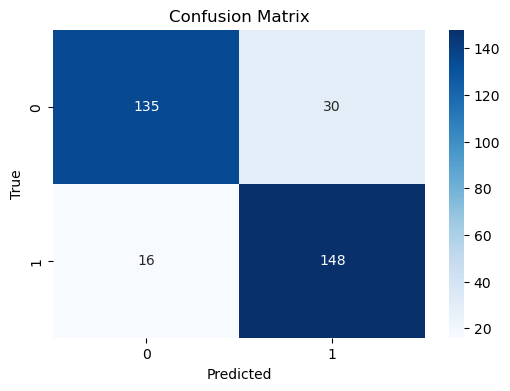

In [142]:

y_pred = model.predict(X_test)  # Предсказания
y_true = y_test  # Настоящие метки

# Вычисляем confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Визуализация с помощью heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**просмотр важных и не очень признаков**

In [136]:
# # Извлечение наилучшей модели из GridSearchCV
# best_model = grid.best_estimator_

# # Коэффициенты признаков
# coefficients = best_model.named_steps['clf'].coef_[0]

# # Создание DataFrame для удобства просмотра
# feature_importance = pd.DataFrame({
#     'Feature': X_train.columns,  # Если у вас названия признаков находятся в X_train
#     'Importance': coefficients
# })

# # Сортировка признаков по важности
# feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
# print(feature_importance)

**Сравнив модели на df_resampled и df_features, я сделал вывод что добавление новых фичей положительно влияет на предсказание модели \
Пока что лучшая модель у меня k-ближайших соседей, хочу посмотреть confusion matrix**

**Матрица ошибок для соседей (лучшей модели пока что)**

In [148]:
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
# score = make_scorer(precision_score, pos_label=1)
score = make_scorer(precision_score, pos_label=1)

pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

# параметры
# n_neighbors=[7, 8, 9]
# p=[7, 8]
# P - 0.82, R - 0.96 с лишним

n_neighbors=[4]
p=[8]
# P - 0.839, R - 0.975 с лишним

weights=['uniform','distance'] #штрафы на дистанции

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler()],
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=cv, return_train_score=True, n_jobs=-1, scoring=score)
grid.fit(X_train,y_train)

print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_) # вывод лучших результатов
display(gridresults.sort_values(["rank_test_score"]).T)

Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.861424

Правильность для наилучшей модели на тестовом наборе: 0.835979



,0,1,2,3,4,5
mean_fit_time,0.006239,0.005464,0.007003,0.001669,0.004519,0.017068
std_fit_time,0.002111,0.000485,0.004384,0.003732,0.00463,0.019519
mean_score_time,0.183834,0.195971,0.085978,0.106561,0.072869,0.103084
std_score_time,0.014595,0.006568,0.006816,0.012769,0.003492,0.039833
param_classifier,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier()
param_classifier__n_neighbors,4,4,4,4,4,4
param_classifier__p,8,8,8,8,8,8
param_classifier__weights,uniform,uniform,uniform,distance,distance,distance
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler()
params,"{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi..."


In [149]:
gridresults.sort_values(["rank_test_score"]).T[2].loc['params']

{'classifier': KNeighborsClassifier(),
 'classifier__n_neighbors': 4,
 'classifier__p': 8,
 'classifier__weights': 'uniform',
 'preprocessing': RobustScaler()}

**Попробуем посмотреть матрицу ошибок для этой модели**

In [151]:
model = Pipeline([('preprocessing', RobustScaler()), 
                 ('classifier', KNeighborsClassifier(n_neighbors = 4, p = 8, weights = 'uniform', n_jobs=-1))])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', RobustScaler()),
                ('classifier',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=4, p=8))])

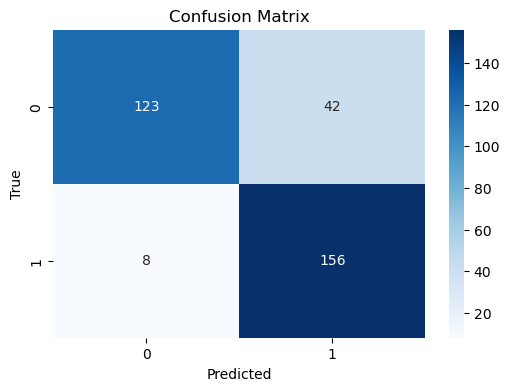

In [152]:

y_pred = model.predict(X_test)  # Предсказания
y_true = y_test  # Настоящие метки

# Вычисляем confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Визуализация с помощью heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
